import necessery modules

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

In [53]:
DAU = pd.read_csv(r'/Users/bartoszbohaterewicz/Desktop/DATA/DAU.csv')
P_Data = pd.read_csv(r'/Users/bartoszbohaterewicz/Desktop/DATA/player_info.csv')

transform to DataFrame

In [54]:
DAU = pd.DataFrame(DAU)
P_Data = pd.DataFrame(P_Data)

In [55]:
print(DAU.head())
print(P_Data.head())

     DATE_DAY  DAY_OF_GAME  PLAYER_ID PLATFORM  GEMS  ENERGY  LEVEL  \
0  2022-01-21           11      32088      ios     3       0     17   
1  2022-01-26           23      27587  android     8       8     28   
2  2022-01-26           14      33184  android     2       0     31   
3  2022-01-26           23      27256      ios     3      18     51   
4  2022-01-26           17      31641  android    15      50     41   

  COUNTRY_CODE  PAID_IN_DAY  
0           DE            0  
1           FR            0  
2           ES           10  
3           VN            0  
4           PL            0  
   PLAYER_ID             INSTALL_TIME PLATFORM       MEDIA_SOURCE  \
0      34550  2022-01-14 18:56:53.000  android  googleadwords_int   
1      34556  2022-01-14 19:06:06.000  android       Facebook Ads   
2      34394  2022-01-14 12:20:28.000  android       Facebook Ads   
3      34405  2022-01-14 12:45:46.000  android  googleadwords_int   
4      34305  2022-01-14 06:15:41.000  android  

Change blanks to "no_data" in both "source" and "campaign"


In [56]:
P_Data.loc[P_Data['MEDIA_SOURCE'].str.len() == 0, 'MEDIA_SOURCE'] = np.NaN
P_Data['MEDIA_SOURCE'] = P_Data['MEDIA_SOURCE'].fillna('no_data')
P_Data.loc[P_Data['CAMPAIGN'].str.len() == 0, 'CAMPAIGN'] = np.NaN
P_Data['CAMPAIGN'] = P_Data['CAMPAIGN'].fillna('no_data')

Merge both spreadsheets


In [57]:
New_Data = pd.merge(DAU,P_Data, on = 'PLAYER_ID',how = 'left')

In [58]:
print(New_Data.value_counts(subset = 'CAMPAIGN'))

CAMPAIGN
Organic                           30618
SR_Android_TIER1_20220103_AEO      8827
SR_Android_Tier1_20220104_tCPI     2874
no_data                            2352
SR_Android_US_20211209_AEO         2071
restricted                         1793
SR_Android_DE_20211209_AEO          686
(WW) Slash & Roll Brand              10
SR_Android_PL_20210924_AAA            1
dtype: int64


Create new variables with individual campaigns


In [59]:
SR_Android_AE0 = New_Data.loc[New_Data['CAMPAIGN'] == 'SR_Android_TIER1_20220103_AEO']
SR_Android_tCPI = New_Data.loc[New_Data['CAMPAIGN'] == 'SR_Android_Tier1_20220104_tCPI']
no_data =  New_Data.loc[New_Data['CAMPAIGN'] == 'no_data']

Create retention plots


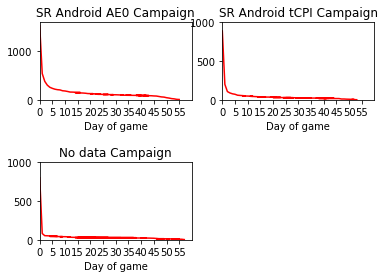

In [60]:
xtick_0 = [*range(0,60,5)]
plt.figure(1)
plt.subplot(2,2,1)
SR_Android_AE0['DAY_OF_GAME'].value_counts().plot(kind='line',color='red')
plt.title('SR Android AE0 Campaign')
plt.xlabel('Day of game')
plt.ylim([0,1600])
plt.xlim([0,60])
plt.xticks(xtick_0)

plt.subplot(2,2,2)
SR_Android_tCPI['DAY_OF_GAME'].value_counts().plot(kind='line', ax=plt.gca(),color='red')
plt.title('SR Android tCPI Campaign')
plt.xlabel('Day of game')
plt.ylim([0,1000])
plt.xlim([0,60])
plt.xticks(xtick_0)

plt.subplot(2,2,3)
no_data['DAY_OF_GAME'].value_counts().plot(kind='line',ax=plt.gca(),color='red')
plt.title('No data Campaign')
plt.xlabel('Day of game')
plt.ylim([0,1000])
plt.xlim([0,60])
plt.xticks(xtick_0)

plt.subplots_adjust(hspace =0.800)
plt.show()